## 第一題 [Data Preprocessing]

(10%) 資料前處理是一個重要的工作，本題將利用UCI的"Adult" dataset <https://archive.ics.uci.edu/ml/datasets/Adult>來練習資料前處理。我們使用這個資料集的方式是用來建構預測最後一個收入欄位是'>50K'或'<=50K'。這個資料集已經先切好了Training跟Test。我們將會沿用這個切割。

資料前處理包含以下工作:
* 生成以下numpy變數: x_train(訓練特徵)、y_train(訓練標籤)、x_test(測試特徵)、y_test(測試標籤)。用一個Dictionary組織將這些變數，其中Key為變數名稱，Value為之前生成的變數內容。
* 最後一欄為標籤，將'>50K'與'<=50K'轉成1跟0。其他欄位為特徵。
* 把所有含有缺值的Rows刪除。
* 所有數值欄位標準化(均數為0，變異數為1)。測試資料特徵需用訓練資料的均數與變異數標準化。
* 所有類別欄位(如native-country與workclass)都應使用"1-of-K"轉換成0與1的欄位。
* 我們只考慮在訓練資料中出現超過(含)10次的特徵值。如果一個特徵值出現不到10次，則刪除這個特徵值所對應的1-of-K欄位。
* 你可以使用sklearn中的工具函數進行1-of-K encoding與變數標準化。

In [1]:
'''讀檔'''
import pandas as pd
import numpy as np

train_data = pd.read_csv('adult.data', header=None, sep=', ', engine='python')
test_data = pd.read_csv('adult.test', header=None, sep=', ', engine='python')

pd.set_option('display.max_columns', None)

train_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
test_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']


### 所有類別欄位使用"1-of-K"轉換成0與1的欄位

In [2]:
from sklearn.preprocessing import OneHotEncoder

encode_category = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for x in encode_category:
    encoder = OneHotEncoder(sparse=False)  # 要回傳 array
    encoded_train_data = pd.DataFrame(encoder.fit_transform(train_data[[x]]))  # fitting requires a 2D array not 1D array
    encoded_train_data.columns = encoder.get_feature_names([x])
    train_data.drop([x], axis=1, inplace=True)
    train_data = pd.concat([train_data, encoded_train_data], axis=1)
# print(train_data)  

for x1 in encode_category:
    encoder1 = OneHotEncoder(sparse=False)
    encoded_test_data = pd.DataFrame(encoder1.fit_transform(test_data[[x1]]))
    encoded_test_data.columns = encoder1.get_feature_names([x1])
    test_data.drop([x1], axis=1, inplace=True)
    test_data = pd.concat([test_data, encoded_test_data], axis=1)
# print(test_data)

### 最後一欄為標籤，將'>50K'與'<=50K'轉成1跟0。

In [3]:
train_data = train_data.replace('>50K', 1)
train_data = train_data.replace('<=50K', 0)

test_data = test_data.replace('>50K.', 1)
test_data = test_data.replace('<=50K.', 0)

### 刪除有缺失值的rows

In [4]:
# 缺失值為 "?" (有缺失值介會是"?")
train_data = train_data[train_data['workclass_?'] != 1]
train_data = train_data[train_data['occupation_?'] != 1]
train_data = train_data[train_data['native-country_?'] != 1]

test_data = test_data[test_data['workclass_?'] != 1]
test_data = test_data[test_data['occupation_?'] != 1]
test_data = test_data[test_data['native-country_?'] != 1]

train_data.drop(['workclass_?'] ,axis=1, inplace=True)
train_data.drop(['occupation_?'] ,axis=1, inplace=True)
train_data.drop(['native-country_?'] ,axis=1, inplace=True)

test_data.drop(['workclass_?'] ,axis=1, inplace=True)
test_data.drop(['occupation_?'] ,axis=1, inplace=True)
test_data.drop(['native-country_?'] ,axis=1, inplace=True)

### 所有數值欄位標準化(均數為0，變異數為1)。測試資料特徵需用訓練資料的均數與變異數標準化。

In [5]:
from sklearn.preprocessing import StandardScaler
test_data['age'] = (test_data['age'] - np.mean(train_data['age'])) / np.std(train_data['age'])
test_data['fnlwgt'] = (test_data['fnlwgt'] - np.mean(train_data['fnlwgt'])) / np.std(train_data['fnlwgt'])
test_data['education-num'] = (test_data['education-num'] - np.mean(train_data['education-num'])) / np.std(train_data['education-num'])
test_data['capital-gain'] = (test_data['capital-gain'] - np.mean(train_data['capital-gain'])) / np.std(train_data['capital-gain'])
test_data['capital-loss'] = (test_data['capital-loss'] - np.mean(train_data['capital-loss'])) / np.std(train_data['capital-loss'])
test_data['hours-per-week'] = (test_data['hours-per-week'] - np.mean(train_data['hours-per-week'])) / np.std(train_data['hours-per-week'])

train_data['age'] = StandardScaler().fit_transform(train_data[['age']])
train_data['capital-loss'] = StandardScaler().fit_transform(train_data[['capital-loss']])
train_data['hours-per-week'] = StandardScaler().fit_transform(train_data[['hours-per-week']])
train_data['capital-gain'] = StandardScaler().fit_transform(train_data[['capital-gain']])
train_data['education-num'] = StandardScaler().fit_transform(train_data[['education-num']])
train_data['fnlwgt'] = StandardScaler().fit_transform(train_data[['fnlwgt']])

### 我們只考慮在訓練資料中出現超過(含)10次的特徵值。如果一個特徵值出現不到10次，則刪除這個特徵值所對應的1-of-K欄位。 

In [6]:
train_data_col = list(train_data.columns)
train_data_col.remove('age')
train_data_col.remove('fnlwgt')
train_data_col.remove('education-num')
train_data_col.remove('capital-gain')
train_data_col.remove('capital-loss')
train_data_col.remove('hours-per-week')

test_data_col = list(test_data.columns)
test_data_col.remove('age')
test_data_col.remove('fnlwgt')
test_data_col.remove('education-num')
test_data_col.remove('capital-gain')
test_data_col.remove('capital-loss')
test_data_col.remove('hours-per-week')

drop_col = []
for col in train_data_col:
    if train_data[col].sum() < 10:
        train_data.drop([col], axis=1, inplace=True)
        drop_col.append(col)

for col1 in test_data_col:
    if col1 in drop_col:
        test_data.drop([col1], axis=1, inplace=True)

### 生成y_train和y_test

In [7]:
adult50k = {}

adult50k['y_train'] = np.array(train_data['class'])
adult50k['y_test'] = np.array(test_data['class'])

In [8]:
col_order = ['capital-loss', 'hours-per-week', 'capital-gain', 'education-num', 'age', 'fnlwgt', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White', 'sex_Female', 'sex_Male', 'occupation_Adm-clerical', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'native-country_Cambodia', 'native-country_Canada', 'native-country_China', 'native-country_Columbia', 'native-country_Cuba', 'native-country_Dominican-Republic', 'native-country_Ecuador', 'native-country_El-Salvador', 'native-country_England', 'native-country_France', 'native-country_Germany', 'native-country_Greece', 'native-country_Guatemala', 'native-country_Haiti', 'native-country_Honduras', 'native-country_Hong', 'native-country_Hungary', 'native-country_India', 'native-country_Iran', 'native-country_Ireland', 'native-country_Italy', 'native-country_Jamaica', 'native-country_Japan', 'native-country_Laos', 'native-country_Mexico', 'native-country_Nicaragua', 'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Peru', 'native-country_Philippines', 'native-country_Poland', 'native-country_Portugal', 'native-country_Puerto-Rico', 'native-country_Scotland', 'native-country_South', 'native-country_Taiwan', 'native-country_Thailand', 'native-country_Trinadad&Tobago', 'native-country_United-States', 'native-country_Vietnam', 'native-country_Yugoslavia', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'class']

train_data = train_data[col_order]
test_data = test_data[col_order]

### 生成x_train和x_test

In [9]:
train_data.drop(['class'], axis=1, inplace=True)
test_data.drop(['class'], axis=1, inplace=True)
adult50k['x_train'] = np.array(train_data)
adult50k['x_test'] = np.array(test_data)


### 生成columnname和num_col

In [10]:
adult50k['columnname'] = np.array(train_data.columns)
adult50k['num_col']= ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

### 前處理完成後，比較你生成的Dictionary與由**adult_m50k.pickle**讀入的資料比較，確定內容相同。

讀取**adult_m50k.pickle**的方式如下:

In [11]:
import pickle
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

為了能方便的比較，你所生成的Dictionary中x_train與x_test的欄位順序應該與adult50kp['columnname']相同。
假設你生成的Dictionary叫adult50k，下面的範例程式比較這個變數與由picke檔案讀入的adult50kp中四個主要變數是否相同:

In [12]:
'''使用 np.isclose 比較四個變數是否相同'''

xtrain = np.isclose(adult50kp['x_test'], adult50k['x_test'])
xtest = np.isclose(adult50kp['x_train'], adult50k['x_train'])
ytrain =  np.isclose(adult50kp['y_train'], adult50k['y_train'])
ytest =  np.isclose(adult50kp['y_test'], adult50k['y_test'])

if False not in xtrain:
    print('x_train match!')
if False not in xtest:
    print('x_test match!')
if False not in ytrain:
    print('y_train match!')
if False not in ytest:
    print('y_test match!')

x_train match!
x_test match!
y_train match!
y_test match!


## 第二題 [ROC and AUC]
(35%) Receiver operation characteristic (ROC)曲線以及其線下面積 (Area Under Curve; AUC)為衡量分類器預測能力常用的工具。本題將練習繪製ROC以及計算AUC。 在這之前我們必須載入資料，訓練模型，並進行預測:

In [13]:
import pickle
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)
    
#train prediction model    
c = 0.3
lr2 = LogisticRegression(solver = 'lbfgs', C= c, max_iter = 1000)
lr2.fit(adult50kp['x_train'], adult50kp['y_train'])
#make prediction
ypred = lr2.predict(adult50kp['x_test'])
ypredprob = lr2.predict_proba(adult50kp['x_test'])
#compute accuracy
ncorrect = np.sum(adult50kp['y_test'] == ypred)
accuracy_sk = ncorrect / adult50kp['y_test'].shape[0]
print("Accuracy = %f" % accuracy_sk)   

Accuracy = 0.848406


In [14]:
# print(ypredprob)
probability = ypredprob[:, 1]

x = list(zip(probability, adult50kp['y_test']))
TPR = []  # true positive rate
FPR = []  # false positive rate
threshold = -np.sort(-probability)

'''將同一模型每個閾值的(FPR, TPR)座標都畫在ROC空間裡，就能成為特定模型的ROC曲線'''

for i in threshold:
    tp = 0  # true positive
    fp = 0  # false positive
    tn = 0  # false negative
    fn = 0  # true negative
    for j in x:
        if j[0] > i:  # 預測為 1 (positive)
            if j[1] == 1:
                tp += 1
            elif j[1] == 0:
                fp += 1
        else:  # j[0] <i : 預測為 0 (negative)
            if j[1] == 1:
                fn += 1
            elif j[1] == 0:
                tn += 1
    TPR.append(tp / (tp + fn))
    FPR.append(fp / (fp + tn))

### 畫出ROC Curve

<Figure size 432x288 with 0 Axes>

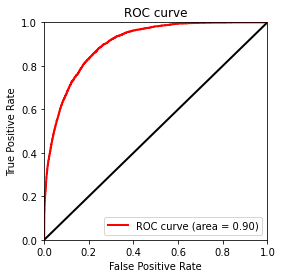

In [18]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.plot(FPR, TPR, color='red', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### 計算AUC

In [16]:
area = 0
for i in range(0, len(TPR)-1):
    area += (1/2)*(TPR[i] + TPR[i+1])*(FPR[i+1] - FPR[i])

print(area)

0.9034020627140571


## 第三題 [Logistic Regression with L2 Regularization]

* Q3.1 (15%) Derive the gradient and hessian matrix for the new E(w). 
* Q3.2 (25%) Create your mylogistic_l2 class. Train your model and show the learned $w$ as well as test accuracy for the cases below. If $w$ is too long for you, show selected $w$ for continuous-valued, binary-valued, and the constant term.  
    * Case 1: lambda = 1 for all coefficients
    * Case 2: lambda = 1 for all but the intercept, no regularization for intercept term.
    * Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.
* Q3.3 (10%) Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters. Set the regularization coefficient for the constant term to zero. Allow different regularizations for continuous-valued and binary-valued features. Let $a_1$ and $a_2$ denote the regularization coefficients for continuous-valued and binary-valued features. Search the best $a_1$ and $a_2$ and report the test accuracy using the best hyper-parameters. You should follow the following procedure to search for the best hyperparameters. 
    1. Choose a set of grids among a reasonable range. For example, 10 grids in [0.01, 100]. 
    2. Conduct grid search with the constraint that $a_1 = a_2$. Record the best value $a_1^*$ and $a_2^*$.
    3. Fix $a_1 = a_1^*$, and search $a_2$ for the best value, call the result the new $a_2^*$. 
    4. Fix $a_2 = a_2^*$, and search $a_1$ for the best value.
    5. Report the selected $a_1$ and $a_2$.
    6. Train a model using the selected hyper-parameters, and report the test accuracy. 
  
* Q3.4 (5%) Use sklearn.linear_model.LogisticRegression to train and test the model (including hyperparameter tuning). Compare the estimated parameters and test accuracy with those from your own models. 

### Q 3.1 Derive the gradient and hessian matrix for the new E(w)

$E(w) = - \sum_{i=1}^n { t_i \ln y_i  + (1 - t_i) \ln (1 - y_i)} + \frac{1}{2} w^T \Lambda w$ <br><br>
Let $\sigma (x) = \frac{1}{1 + exp({-x})}$ <br><br>
Let $z_1 = t_i \ln \sigma (w^T x_i)$ <br><br>
Let $z_2 = (1-t_i) \ln[1 - \sigma (w^T x_i)]$ <br><br>
$\frac{\partial z_1}{\partial w} = \frac{t_i\sigma(w^Tx_i)(1-\sigma(w^Tx_i))x_i}{\sigma(w^Tx_i)} = t_i (1-\sigma(w^Tx_i))x_i$ <br><br>
$\frac{\partial z_2}{\partial w} = \frac{(t_i-1)\sigma(w^Tx_i)(1-\sigma(w^Tx_i))x_i}{1-\sigma(w^Tx_i)} = (t_i-1) (\sigma(w^Tx_i))x_i$ <br><br>
$\frac{\partial z}{\partial w} = \frac{\partial z_1}{\partial w} + \frac{\partial z_1}{\partial w} = (t_i - \sigma(w^Tx_i))x_i$ <br><br>
$\frac{\partial \frac{1}{2} w^T \Lambda w}{\partial w} = \frac{1}{2} (\Lambda + \Lambda^T) w = \Lambda w $<br><br>
$\nabla E(w) = \Lambda w + \sum_{i=1}^{N}[\sigma(w^Tx_i)-t_i]x_i = X^T (y-t)+\Lambda w$ <br><br>
$H = \Lambda  + \sum_{i=1}^{N} [(w^T x_i)(1-w^T x_i)x_i x_i^T] = X^T R X + \Lambda $

### Q3.2 Create your mylogistic_l2 class. 
Train your model and show the learned $w$ as well as test accuracy for the cases below. If $w$ is too long for you, show selected $w$ for continuous-valued, binary-valued, and the constant term.

In [19]:
dsfile = 'adult_m50k.pickle'
with open(dsfile, 'rb') as fh1:
    adult50kp = pickle.load(fh1)

# print(adult50kp.keys())

In [20]:
class mylogistic_l2():
    def __init__(self, reg_vec, max_iter=100, tol=1e-5, add_intercept=True):
        """reg_vec: the regularization coefficient vector
           max_iter: maximum number of iteration to run for the Newton method
           tol: tolerance for the objective function
           add_intercept: whether to add intercept (a column of ones) at last column of the feature matrix"""

        self.reg_vec = reg_vec
        self.max_iter = max_iter
        self.tol = tol
        self.add_intercept = add_intercept

    def fit(self, x, y, verbal=False):
        # Add your code here
        if self.add_intercept == True:
            x = np.column_stack((x, np.ones(len(x))))
        # print(x.shape)  # x: 30162 * 103

        w = np.linalg.inv(np.dot(x.T, x) + np.eye(x.shape[1]) * np.mean(self.reg_vec.diagonal())).dot(x.T).dot(y)
        # print(w.shape): 1 * 103

        errors = []

        for i in range(self.max_iter):
            sigmoid = 1 / (1 + np.exp(-np.dot(x, w)))  # sigmoid: 1 * 30162
            gradient = np.dot((sigmoid - y), x) + np.dot(self.reg_vec, w)
            # print(np.diag(sigmoid).shape)  # 30162 * 30162
            hessian = x.T.dot(np.diag(sigmoid)).dot(np.diag((1-sigmoid))).dot(x) + self.reg_vec
            # print(hessian)
            new_w = w - np.dot(np.linalg.inv(hessian), gradient)
            # print(new_w)
            new_sigmoid = 1 / (1 + np.exp(-np.dot(x, new_w)))
            error = (1/2)*(np.dot(np.dot(self.reg_vec, new_w), new_w)) - (np.dot((1-y.T), np.log(1-new_sigmoid))+np.dot(y.T, np.log(new_sigmoid)))

            w = new_w
            errors.append(error)

            if i != 0 and (errors[-2] - error < self.tol):
                break
        # print(errors)
        self.w = w

    def predict(self, x):
        '''doing prediction'''
        x = np.column_stack((x, np.ones(len(x))))
        y_predicts = 1 / (1 + np.exp(-np.dot(x, self.w.T)))
        classes = []
        for i in y_predicts:
            if i > 0.5:
                classes.append(1)
            else:
                classes.append(0)

        return classes    
    
    def return_w(self):
        print('w: ', self.w)

### Case 1: lambda = 1 for all coefficients

In [21]:
xtrain = adult50kp['x_train']  
ytrain = adult50kp['y_train']
xtest = adult50kp['x_test']
ytest = adult50kp['y_test']

lamb = np.eye(xtrain.shape[1] + 1)
logistic = mylogistic_l2(reg_vec = lamb, max_iter = 1000, tol = 1e-5, add_intercept = True)
logistic.fit(xtrain, ytrain)
y_predicts = logistic.predict(xtest)

corrects = 0
for i in range(len(y_predicts)):
    if y_predicts[i] == ytest[i]:
            corrects += 1
            
accuracy = corrects / len(y_predicts)
print('accuracy: ', accuracy)
logistic.return_w()

accuracy:  0.847875166002656
w:  [ 2.58310749e-01  3.52951378e-01  2.33390152e+00  7.51145211e-01
  3.33524430e-01  7.92368680e-02 -2.59305992e-01 -3.31059192e-02
 -8.02092312e-01 -1.16328375e+00 -1.57480268e-01  1.06974336e+00
 -6.33846058e-01  1.16732409e-01 -2.31567381e-01 -5.17122207e-01
 -7.97216465e-02 -1.09949780e+00 -2.46027086e-01  6.19694928e-02
  1.26685884e-01  8.62656059e-01 -9.18352843e-01 -6.21226177e-01
 -2.00740224e-01 -7.51600981e-01 -1.61011588e+00  5.75820911e-01
  6.48995283e-01  3.53741434e-01  7.17218474e-01 -2.84494743e-02
 -9.54820746e-04 -1.96540899e-01 -1.46351640e-01  6.26946275e-01
  4.48207080e-01  2.45945819e-02  4.69223657e-02 -4.91067746e-01
 -2.03035424e-01 -1.63303680e-01 -1.76623501e-02 -1.11328323e-01
 -9.94618240e-02 -1.17391916e+00  1.80702678e-01 -6.92720004e-02
  9.76496905e-01  4.60988601e-01 -4.95440416e-01 -1.27203531e+00
  4.86772406e-01 -8.98963733e-01 -6.00542591e-02 -3.50848853e-01
  4.32815220e-01  5.94120150e-01  5.82151924e-01 -6.20962

### Case 2: lambda = 1 for all but the intercept, no regularization for intercept term.

In [22]:
lamb = np.eye(xtrain.shape[1] + 1)
lamb[102][102] = 0
logistic = mylogistic_l2(reg_vec = lamb, max_iter = 1000, tol = 1e-5, add_intercept = True)
logistic.fit(xtrain, ytrain)
y_predicts = logistic.predict(xtest)

corrects = 0
for i in range(len(y_predicts)):
    if y_predicts[i] == ytest[i]:
            corrects += 1
            
accuracy = corrects / len(y_predicts)
print('accuracy: ', accuracy)
logistic.return_w()

accuracy:  0.8477423638778221
w:  [ 0.25833063  0.35307341  2.33348255  0.7378757   0.33385106  0.07926886
 -0.04219572  0.1998764  -0.58360968 -0.93671312  0.07548468  1.28715744
 -0.37140327  0.39422898  0.04305748 -0.26147348  0.19559029 -0.42695771
  0.42695771  0.16424528  0.22840772  0.96472553 -0.81743779 -0.52074423
 -0.09910239 -0.64944042 -1.55235098  0.6786798   0.75066429  0.45541098
  0.81857112  0.07308911  0.0728464  -0.11752644 -0.06282948  0.67242506
  0.5040869   0.08799091  0.11435013 -0.38483984 -0.10196309 -0.05145374
  0.10741777 -0.01997934  0.01717544 -1.16567808  0.30082277  0.02715464
  1.00831207  0.50210397 -0.45756662 -1.24002555  0.52780939 -0.86832688
 -0.02771494 -0.31412701  0.47343435  0.62981111  0.62405658 -0.5867506
 -0.0296708   0.12414401 -0.14376238  0.02434194  0.0621604  -0.24843986
  0.19459429  0.52620501  0.93165615  0.18707696  0.37950109 -0.28749402
 -0.31137357 -0.33290534 -0.65117786 -0.38160106  0.48879121  0.17662205
  0.17410342 -0.07

### Case 3: lambda = 1 for numerical-valued features, lambda = 0.5 for binary-valued features, no regularization for intercept term.

In [23]:
lamb = np.eye(xtrain.shape[1] + 1)
lamb = 0.5 * lamb
for i in range(6):
    lamb[i][i] = 1
lamb[102][102] = 0
logistic = mylogistic_l2(reg_vec = lamb, max_iter = 1000, tol = 1e-5, add_intercept = True)
logistic.fit(xtrain, ytrain)
y_predicts = logistic.predict(xtest)

corrects = 0
for i in range(len(y_predicts)):
    if y_predicts[i] == ytest[i]:
            corrects += 1
            
accuracy = corrects / len(y_predicts)
print('accuracy: ', accuracy)
logistic.return_w()

accuracy:  0.847675962815405
w:  [ 0.25851661  0.3533387   2.33562764  0.7825921   0.33439916  0.07940036
 -0.08347988  0.23309134 -0.59278098 -0.9224849   0.11139573  1.25425869
 -0.38299462  0.41291781  0.04136013 -0.26411462  0.19283128 -0.42890321
  0.42890321  0.23635122  0.30021361  1.03810521 -0.75216086 -0.4534137
 -0.02691157 -0.5825269  -2.00075382  0.75127891  0.82696617  0.52830705
  0.89488994  0.14510375  0.18253094 -0.02583999  0.00991404  0.89862004
  0.68517002  0.23294385  0.24519931 -0.38363083 -0.08029608 -0.06493444
  0.0453608   0.03743376 -0.01295908 -2.09374319  0.25763304  0.06659781
  1.18748312  0.55059265 -0.47576613 -1.45842154  0.5822242  -1.0627833
 -0.00957211 -0.31704572  0.52485137  0.73044517  0.67457228 -0.63624179
 -0.00967268  0.17339113 -0.2364757   0.0375474   0.10120874 -0.24679341
  0.23800627  0.64228457  1.00567032  0.23258941  0.42267607 -0.35336167
 -0.29178766 -0.38125401 -0.96291964 -0.45007954  0.512985    0.22019382
  0.22640627 -0.0498

### Q3.3 Further split the training data into subtraining (90%) and tuning (10%) to search for the best hyperparameters.

### 1. Choose a set of grids among a reasonable range. 

In [24]:
alist = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 8, 10, 50, 100]

xsubtrain, xtune = np.split(xtrain, [int(0.9 * xtrain.shape[0])])
ysubtrain, ytune = np.split(ytrain, [int(0.9 * xtrain.shape[0])])

for a in alist:
    lamb = np.eye(xsubtrain.shape[1] + 1)
    lamb = a * lamb
    lamb[102][102] = 0
    logistic = mylogistic_l2(reg_vec = lamb, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logistic.fit(xsubtrain, ysubtrain)
    y_predicts = logistic.predict(xtune)

    corrects = 0
    for i in range(len(y_predicts)):
        if y_predicts[i] == ytune[i]:
                corrects += 1
            
    accuracy = corrects / len(y_predicts)
    print('coefficient:', a, '; accuracy: ', accuracy)

coefficient: 0.01 ; accuracy:  0.843221743453762
coefficient: 0.05 ; accuracy:  0.843221743453762
coefficient: 0.1 ; accuracy:  0.843221743453762
coefficient: 0.5 ; accuracy:  0.8428902883659264
coefficient: 1 ; accuracy:  0.8428902883659264
coefficient: 2 ; accuracy:  0.8438846536294332
coefficient: 5 ; accuracy:  0.8435531985415976
coefficient: 8 ; accuracy:  0.8428902883659264
coefficient: 10 ; accuracy:  0.8415644680145841
coefficient: 50 ; accuracy:  0.8418959231024197
coefficient: 100 ; accuracy:  0.8405701027510772


### 2. Choose best values a1* = a2* = 2 and report the test accuracy

In [25]:
lamb = np.eye(xtrain.shape[1] + 1)
lamb = 2 * lamb
lamb[102][102] = 0
logistic = mylogistic_l2(reg_vec = lamb, max_iter = 1000, tol = 1e-5, add_intercept = True)
logistic.fit(xtrain, ytrain)
y_predicts = logistic.predict(xtest)

corrects = 0
for i in range(len(y_predicts)):
    if y_predicts[i] == ytest[i]:
            corrects += 1
            
accuracy = corrects / len(y_predicts)
print('test accuracy: ', accuracy)

test accuracy:  0.8482735723771581


### 3. Fix $a_1 = a_1^* = 2$ and search $a_2$ for the best value. 

In [26]:
a2 = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 8, 10, 50, 100]

for a in a2:
    lamb = np.eye(xsubtrain.shape[1] + 1)
    lamb = a * lamb
    for i in range(6):
        lamb[i][i] = 2
    lamb[102][102] = 0
    
    logistic = mylogistic_l2(reg_vec = lamb, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logistic.fit(xsubtrain, ysubtrain)
    y_predicts = logistic.predict(xtune)

    corrects = 0
    for i in range(len(y_predicts)):
        if y_predicts[i] == ytune[i]:
                corrects += 1
            
    accuracy = corrects / len(y_predicts)
    print('coefficient:', a, '; accuracy: ', accuracy)

coefficient: 0.01 ; accuracy:  0.843221743453762
coefficient: 0.05 ; accuracy:  0.843221743453762
coefficient: 0.1 ; accuracy:  0.843221743453762
coefficient: 0.5 ; accuracy:  0.8428902883659264
coefficient: 1 ; accuracy:  0.8428902883659264
coefficient: 2 ; accuracy:  0.8438846536294332
coefficient: 5 ; accuracy:  0.8435531985415976
coefficient: 8 ; accuracy:  0.8435531985415976
coefficient: 10 ; accuracy:  0.8422273781902552
coefficient: 50 ; accuracy:  0.8402386476632416
coefficient: 100 ; accuracy:  0.8402386476632416


### 4. Fix $a_2 = a_2^* = 2$ and search $a_1$ for the best value. 

In [27]:
a1 = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 8, 10, 50, 100]

for a in a1:
    lamb = np.eye(xsubtrain.shape[1] + 1)
    lamb = 2 * lamb
    for i in range(6):
        lamb[i][i] = a
    lamb[102][102] = 0
    
    logistic = mylogistic_l2(reg_vec = lamb, max_iter = 1000, tol = 1e-5, add_intercept = True)
    logistic.fit(xsubtrain, ysubtrain)
    y_predicts = logistic.predict(xtune)

    corrects = 0
    for i in range(len(y_predicts)):
        if y_predicts[i] == ytune[i]:
                corrects += 1
            
    accuracy = corrects / len(y_predicts)
    print('coefficient:', a, '; accuracy: ', accuracy)

coefficient: 0.01 ; accuracy:  0.8438846536294332
coefficient: 0.05 ; accuracy:  0.8438846536294332
coefficient: 0.1 ; accuracy:  0.8438846536294332
coefficient: 0.5 ; accuracy:  0.8438846536294332
coefficient: 1 ; accuracy:  0.8438846536294332
coefficient: 2 ; accuracy:  0.8438846536294332
coefficient: 5 ; accuracy:  0.8435531985415976
coefficient: 8 ; accuracy:  0.8438846536294332
coefficient: 10 ; accuracy:  0.8435531985415976
coefficient: 50 ; accuracy:  0.8428902883659264
coefficient: 100 ; accuracy:  0.8428902883659264


### 5. Choose: a1* = 0.05 (從多個相同者中隨機選一個) & a2* = 2
### 6. Train a model using the selected hyper-parameters, and report the test accuracy. 

In [28]:
lamb = np.eye(xtrain.shape[1] + 1)
lamb = 2 * lamb
for i in range(6):
    lamb[i][i] = 0.05
lamb[102][102] = 0

logistic = mylogistic_l2(reg_vec = lamb, max_iter = 1000, tol = 1e-5, add_intercept = True)
logistic.fit(xtrain, ytrain)
y_predicts = logistic.predict(xtest)

corrects = 0
for i in range(len(y_predicts)):
    if y_predicts[i] == ytest[i]:
            corrects += 1
            
accuracy = corrects / len(y_predicts)
print('test accuracy: ', accuracy)

test accuracy:  0.8482735723771581


### 3.4 Use sklearn.linear_model.LogisticRegression to train and test the model (including hyperparameter tuning). Compare the estimated parameters and test accuracy with those from your own models. 

In [29]:
from sklearn.linear_model import LogisticRegression

alist = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 8, 10, 50, 100]
for a in alist:
    x = LogisticRegression(C=a, max_iter=1000)
    logistic = x.fit(xsubtrain, ysubtrain)
    sk_ypredicts = logistic.predict(xtune)

    corrects = 0
    for i in range(len(sk_ypredicts)):
        if sk_ypredicts[i] == ytune[i]:
            corrects += 1
            
    accuracy = corrects / len(sk_ypredicts)
    print('coefficient:', a, '; accuracy: ', accuracy)

coefficient: 0.01 ; accuracy:  0.8405701027510772
coefficient: 0.05 ; accuracy:  0.8409015578389128
coefficient: 0.1 ; accuracy:  0.8415644680145841
coefficient: 0.5 ; accuracy:  0.8438846536294332
coefficient: 1 ; accuracy:  0.8428902883659264
coefficient: 2 ; accuracy:  0.8428902883659264
coefficient: 5 ; accuracy:  0.843221743453762
coefficient: 8 ; accuracy:  0.843221743453762
coefficient: 10 ; accuracy:  0.843221743453762
coefficient: 50 ; accuracy:  0.843221743453762
coefficient: 100 ; accuracy:  0.843221743453762


### Choose regularization coefficient = 0.5

In [30]:
x = LogisticRegression(C=0.5, max_iter=1000)
logistic = x.fit(xtrain, ytrain)
sk_ypredicts = logistic.predict(xtest)

corrects = 0
for i in range(len(sk_ypredicts)):
    if sk_ypredicts[i] == ytest[i]:
        corrects += 1
            
accuracy = corrects / len(sk_ypredicts)
print('test accuracy: ', accuracy)

test accuracy:  0.848207171314741


### Conclusion: After doing hyperparameter tuning, the test accuracy of sklearn logistic regression model is much the same to my model.